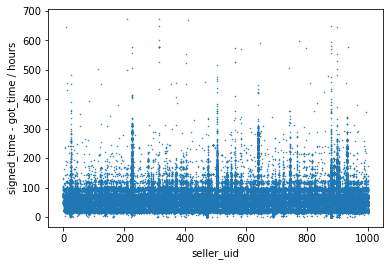

In [56]:
#将图片内嵌在交互窗口，而不是弹出一个图片窗口
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
data = open('data/SeedCup_pre_train.csv', 'r')
header = data.readline()[:-1].split('\t')
orders = []
chart = {}
x = []
y = []
for lines in data:
    raw = lines[:-1].split('\t')
    fields = {}
    idx = 0
    for item in header:
        fields[item] = raw[idx]
        idx+=1 
    orders.append(fields)
    chart[fields['seller_uid']] = []

for order in orders:
    try:
        time = datetime.fromisoformat(order['signed_time']) - datetime.fromisoformat(order['got_time'])
        time = time.total_seconds()/60/60
        x.append(int(order['seller_uid']))
        y.append(time)
    except:
        pass
plt.ylabel('signed_time - got_time / hours')
plt.xlabel('seller_uid')
plt.plot(x, y, '.', markersize=1)
#下面行不写会出现 [<matplotlib.lines.Line2D at 0x111814390>] 字样
plt.show() 